# Chapter 5 - Machine Learning

## Import Libraries and Data:

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../datasets/dataset_wisc_sd.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df[["id", "diagnosis", "radius_mean", "texture_mean", "concave points_worst"]].head()

,id,diagnosis,radius_mean,texture_mean,concave points_worst
0,842302,M,17.99,10.38,0.2654
1,842517,M,20.57,17.77,0.186
2,84300903,M,19.69,21.25,0.243
3,84348301,M,11.42,20.38,0.2575
4,84358402,M,20.29,14.34,0.1625


## Exploratory Data Analysis:

In [5]:
df[["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "concave points_worst"]].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean
count,5.690000e+02,569.000000,569.000000,569.000000,567.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,655.657848
std,1.250206e+08,3.524049,4.301036,24.298981,352.288768
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.700000
75%,8.813129e+06,15.780000,21.800000,104.100000,785.600000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000


#### Check Missing Values and Types:

In [6]:
df.shape

(569, 32)

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                567 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                566 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
# df['concave points_worst'] = df['concave points_worst'].astype(float) # Will error out

In [10]:
df[df['concave points_worst'].str.contains(r"\\n")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
146,869691,M,11.8,16.58,78.99,432.0,0.1091,0.17,0.1659,0.07415,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.4504,0.1865\n\n,0.5774,0.103


In [11]:
df["concave points_worst"].iloc[146]

'0.1865\\n\\n'

In [12]:
#df["concave points_worst"] = pd.to_numeric(df["concave points_worst"], errors='coerce')

In [13]:
df = df.replace(r'\\n','', regex=True) #

In [14]:
df["concave points_worst"].iloc[146]

'0.1865'

In [15]:
df['concave points_worst'] = df['concave points_worst'].astype(float)

In [16]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
df.isna().values.sum()

7

In [18]:
df.shape

(569, 32)

In [19]:
df.dropna().shape

(562, 32)

In [20]:
df = df.dropna()
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Check Output Balance:

In [21]:
df['diagnosis'].value_counts()

B    354
M    208
Name: diagnosis, dtype: int64

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

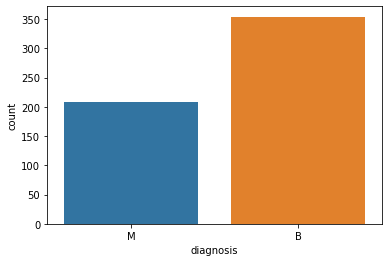

In [22]:
sns.countplot(df['diagnosis'])

In [23]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

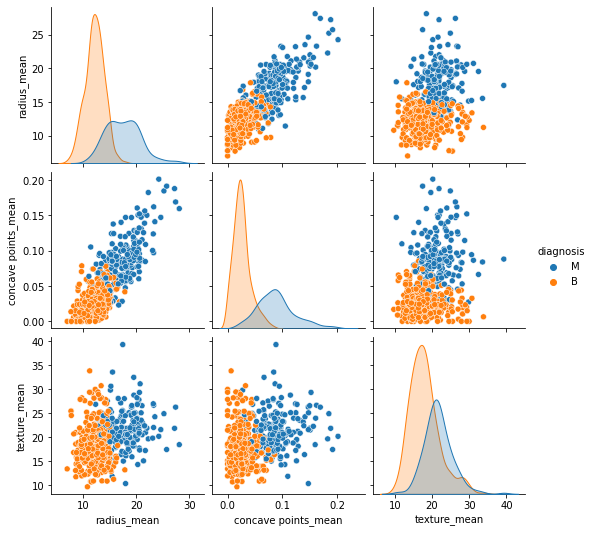

In [24]:
sns.pairplot(df[["diagnosis", "radius_mean", "concave points_mean", "texture_mean"]], hue = 'diagnosis')

#### IQR to Detect Outliers:

In [25]:
dfm = df[df["diagnosis"] == "M"]

Q1 = dfm['radius_mean'].quantile(0.25)
Q3 = dfm['radius_mean'].quantile(0.75)
IQR = Q3 - Q1


print("Upper  : ", Q1 + 1.5*IQR)
print("Q3     : ", Q3)
print("Mean   : ", df['radius_mean'].mean())
print("Median : ", df['radius_mean'].median())
print("Q1     : ", Q1)
print("Lower  : ", Q1 - 1.5*IQR)
print("IQR    : ", IQR)

Upper  :  21.881249999999994
Q3     :  19.612499999999997
Mean   :  14.120567615658373
Median :  13.32
Q1     :  15.075000000000001
Lower  :  8.268750000000008
IQR    :  4.537499999999996


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

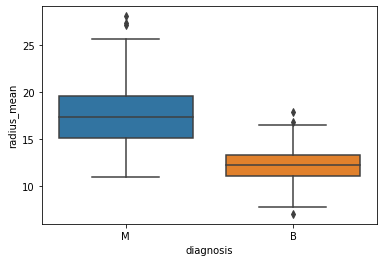

In [26]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)

In [27]:
df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= radius_mean <= (@Q3 + 1.5 * @IQR)')
df_filtered.shape

(553, 32)

In [28]:
dl_benign = df[df['diagnosis'] =='B']['radius_mean']

above = dl_benign[dl_benign < (Q1 - 1.5*IQR)].values 
below = dl_benign[dl_benign > (Q1 + 1.5*IQR)].values
len(np.concatenate([above,below], axis = 0))
np.concatenate([above,below], axis = 0)

array([8.196, 6.981, 8.219, 7.729, 7.691, 7.76 ])

#### Correlation:

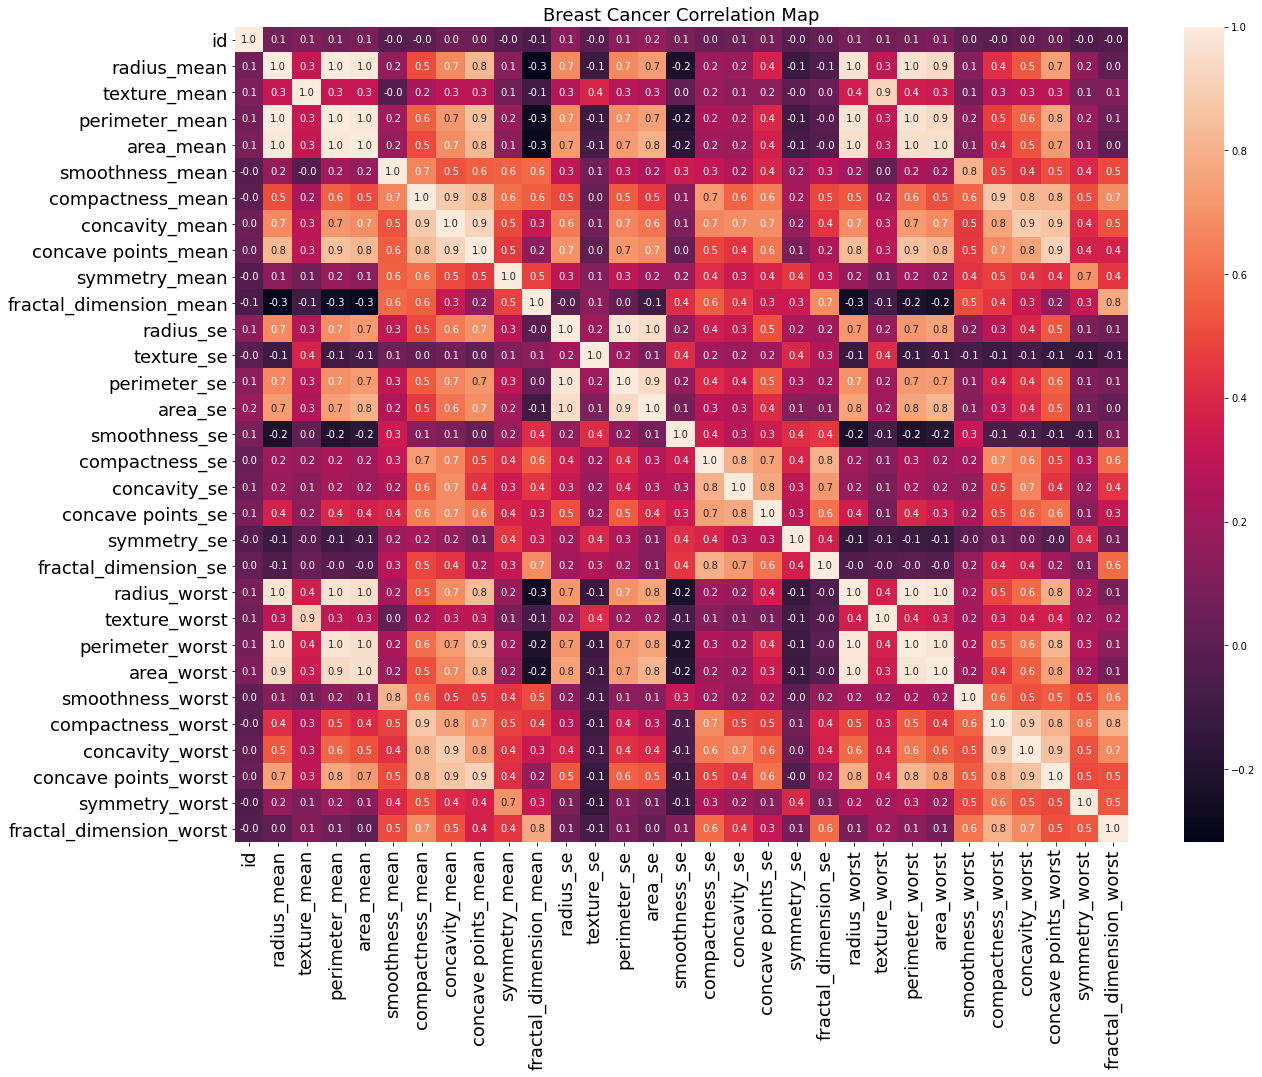

In [29]:
f, ax=plt.subplots( figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

#### Remove Correlations:

In [30]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [31]:
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

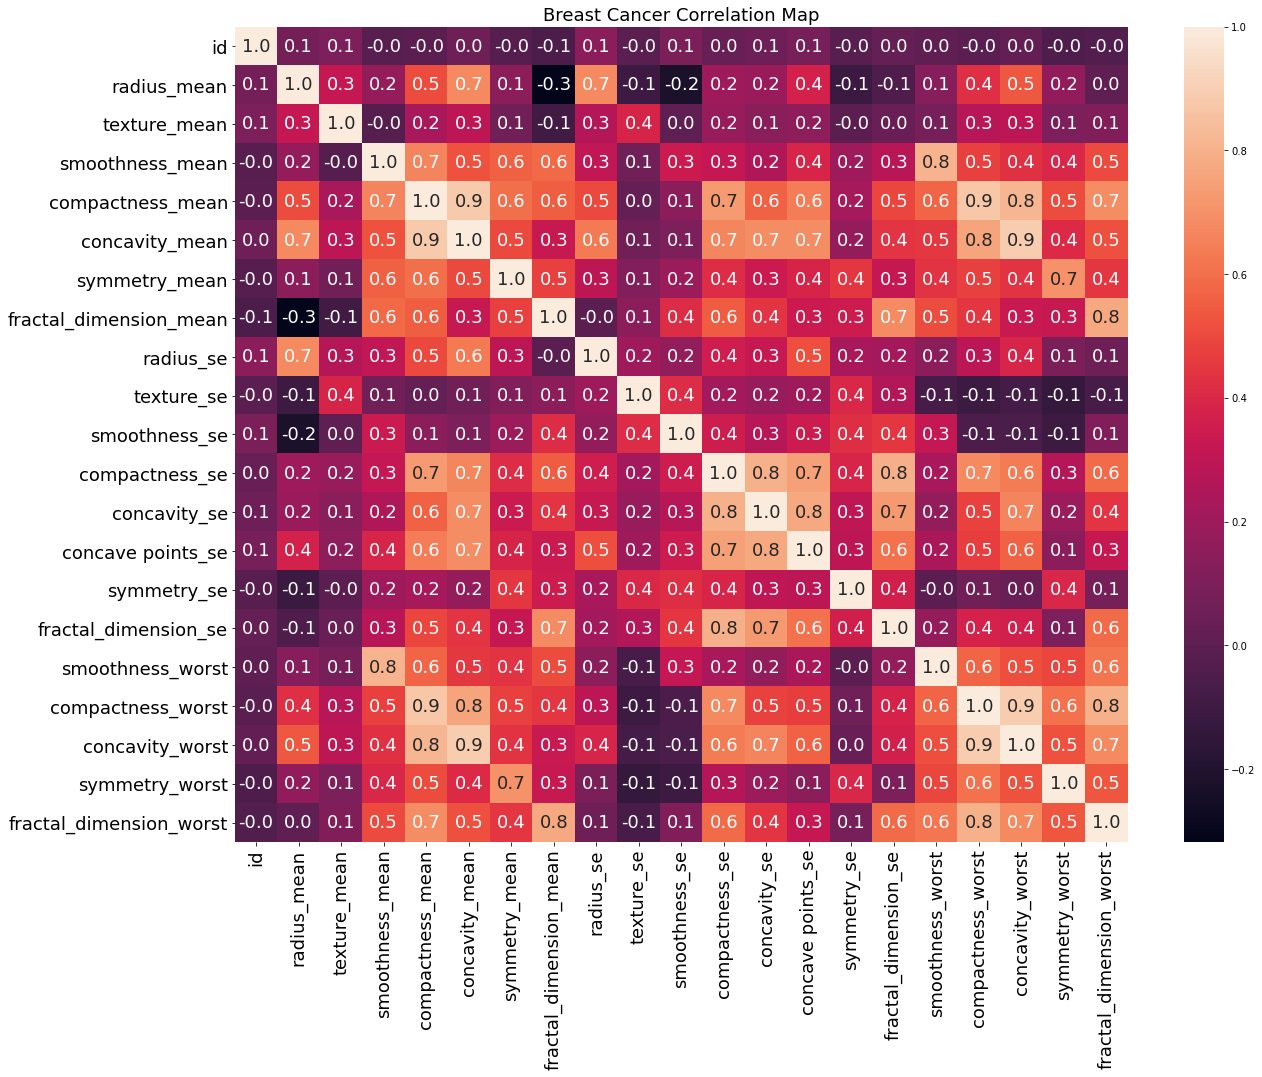

In [32]:
f,ax=plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(), annot= True, fmt = ".1f", ax=ax, annot_kws={"fontsize":18})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Breast Cancer Correlation Map', fontsize=18)
plt.show()

In [33]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Model Development & Validation:

In [50]:
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

In [51]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.095432,-2.071547,1.568265,3.313831,2.654770,2.219596,2.276907,2.486111,-0.565868,-0.214823,1.341087,0.729087,0.684116,1.158122,0.924202,1.311579,2.687591,2.136591,2.759909,2.030486
1,1.825827,-0.352468,-0.821208,-0.481331,-0.019743,0.005860,-0.870067,0.499147,-0.881045,-0.604835,-0.689787,-0.435502,0.276978,-0.802463,-0.092378,-0.373512,-0.427937,-0.141086,-0.238156,0.305317
2,1.576700,0.457057,0.943566,1.068703,1.366437,0.943142,-0.396022,1.227280,-0.783586,-0.297543,0.833933,0.218233,1.460481,0.243425,0.304550,0.530469,1.119420,0.870139,1.159645,0.222177
3,-0.764528,0.254676,3.279088,3.434003,1.918401,2.868764,4.951264,0.326571,-0.104872,0.685792,2.783481,0.824562,1.145650,4.753742,2.076020,3.400389,3.992990,2.015515,6.059239,5.154033
4,1.746559,-1.150363,0.283373,0.551771,1.373964,-0.005081,-0.561652,1.269073,-0.793884,1.476446,-0.038620,0.833513,1.175320,-0.356654,0.512374,0.223291,-0.308259,0.626050,-0.863361,-0.401378


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

gnb_pred = gnb_clf.predict(X_test)
print(accuracy_score(gnb_pred, y_test))

0.950354609929078


In [55]:
from sklearn.metrics import classification_report
print(classification_report(gnb_pred, y_test))

             precision    recall  f1-score   support

          B       0.96      0.97      0.96        94
          M       0.93      0.91      0.92        47

avg / total       0.95      0.95      0.95       141



In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42, max_depth=1)
rfc_clf.fit(X_train, y_train)

rfc_pred = rfc_clf.predict(X_test)
print(classification_report(rfc_pred, y_test))

             precision    recall  f1-score   support

          B       0.96      0.94      0.95        97
          M       0.87      0.91      0.89        44

avg / total       0.93      0.93      0.93       141



In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(random_state=42, max_depth=4)
rfc_clf.fit(X_train, y_train)

rfc_pred = rfc_clf.predict(X_test)
print(classification_report(rfc_pred, y_test))

             precision    recall  f1-score   support

          B       0.94      0.97      0.95        92
          M       0.93      0.88      0.91        49

avg / total       0.94      0.94      0.94       141



#### Saving and Loading the Scaler:

In [58]:
import pickle
pickle.dump(scaler, open("../../models/ch5_scaler.pickle", 'wb'))

In [65]:
loaded_scaler = pickle.load(open("../../models/ch5_scaler.pickle", 'rb'))

In [60]:
scaler == loaded_scaler

False

In [64]:
scaler.scale_ == loaded_scaler.scale_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### Saving and Loading the Model:

In [43]:
import pickle
pickle.dump(gnb_clf, open("../../models/ch5_gnb_clf.pickle", 'wb'))

In [44]:
loaded_gnb_clf = pickle.load(open("../../models/ch5_gnb_clf.pickle", 'rb'))
loaded_gnb_clf.score(X_test, y_test)

0.950354609929078